In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Descarcă datele pentru Microsoft
ticker = "MSFT"
data = yf.download(ticker, start="2020-01-01", end="2025-01-01")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


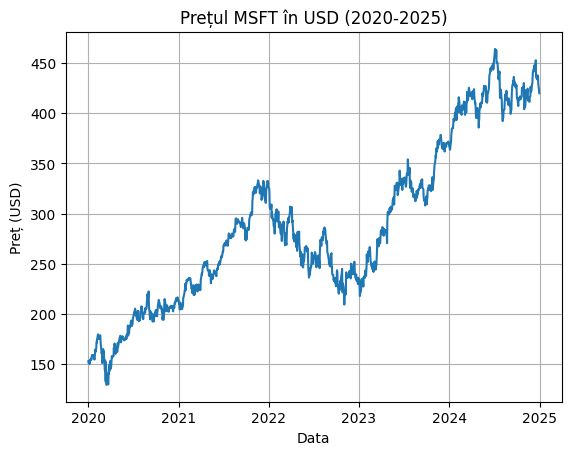

In [2]:
plt.plot(data['Close']['MSFT'])
plt.title('Prețul MSFT în USD (2020-2025)')
plt.ylabel('Preț (USD)')
plt.grid()
plt.xlabel('Data')
plt.show()

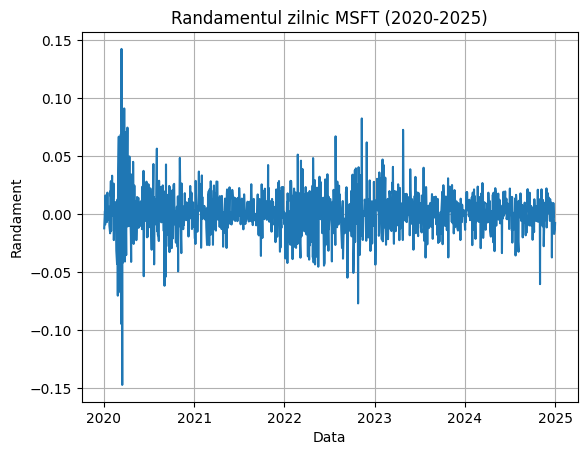

In [3]:

# Calculează randamentele zilnice
data['Daily Return'] = data['Close']["MSFT"].pct_change()
 
 
plt.plot(data['Daily Return']  )
plt.title('Randamentul zilnic MSFT (2020-2025)')
plt.xlabel('Data')
plt.ylabel('Randament')
plt.grid()
plt.show()


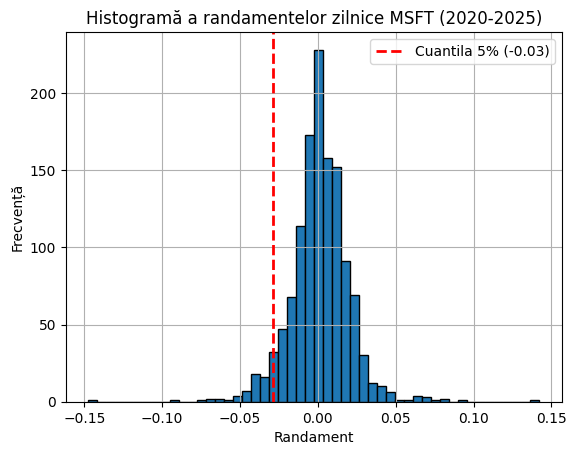

In [4]:
import numpy as np

data['Daily Return'] = data['Close']["MSFT"].pct_change()
daily_returns = data['Daily Return'].dropna()

plt.hist(daily_returns, bins=50, edgecolor='black')

quantile_5 = np.quantile(daily_returns, 0.05)
plt.axvline(quantile_5, color='red', linestyle='--', linewidth=2, label=f'Cuantila 5% ({quantile_5:.2f})')

plt.title('Histogramă a randamentelor zilnice MSFT (2020-2025)')
plt.xlabel('Randament')
plt.ylabel('Frecvență')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
data1 = yf.download('F', start="2020-01-01", end="2020-02-01")
data2 = yf.download('TSLA', start="2020-01-01", end="2020-02-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:

# Calculează randamentele zilnice
data1['Daily Return'] = data1['Close']["F"].pct_change()
data2['Daily Return'] = data2['Close']["TSLA"].pct_change()
 
 


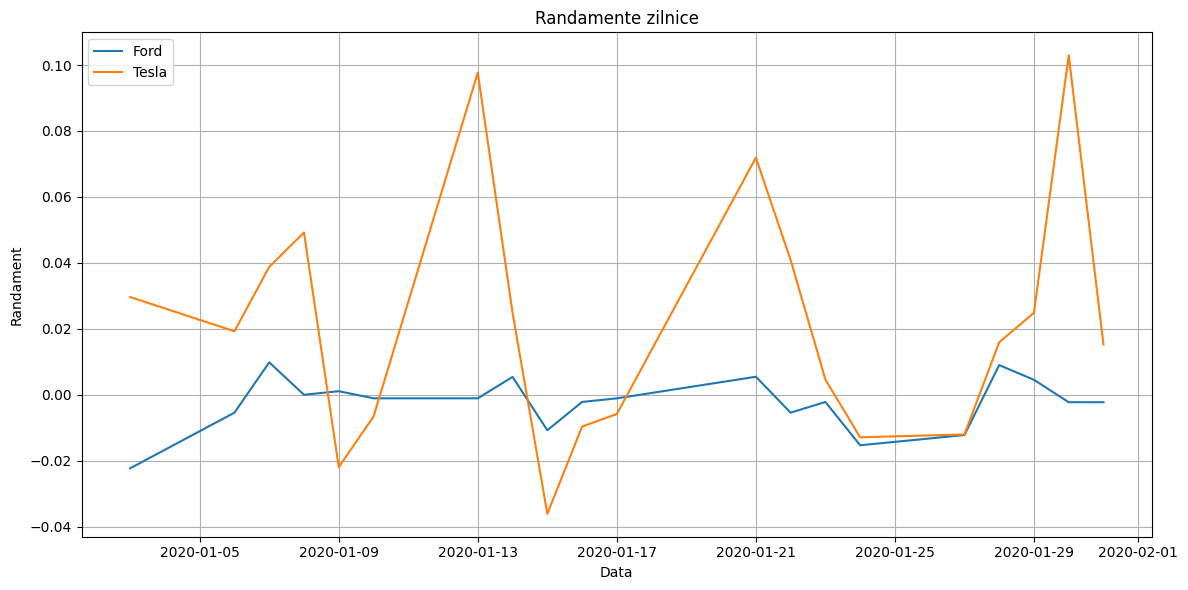

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming data1 and data2 are already loaded DataFrames
# For demonstration purposes, let's create dummy dataframes if they don't exist
# In a real scenario, you would load your actual stock data here.
# Example:
# data1 = pd.read_csv('msft_data.csv', index_col='Date', parse_dates=True)
# data2 = pd.read_csv('aapl_data.csv', index_col='Date', parse_dates=True)

# Create dummy data for demonstration if data1 and data2 are not defined
try:
    data1['Close']["F"]
except NameError:
    print("Creating dummy data for demonstration. Please replace with your actual data loading.")
    dates = pd.date_range(start='2020-01-01', end='2025-05-31', freq='B') # Business days
    # Simulate some stock price movement
    msft_prices = pd.Series([150 + i*0.1 + (i%10)*0.5 - (i%5)*0.2 for i in range(len(dates))], index=dates)
    aapl_prices = pd.Series([100 + i*0.2 + (i%8)*0.4 - (i%3)*0.1 for i in range(len(dates))], index=dates)

    data1 = pd.DataFrame({'Close': msft_prices})
    data1.columns.set_levels(['F'], level=1, inplace=True) # Set multi-index for 'Close'
    data1.columns = pd.MultiIndex.from_product([['Close'], ['F']])

    data2 = pd.DataFrame({'Close': aapl_prices})
    data2.columns.set_levels(['TSLA'], level=1, inplace=True) # Set multi-index for 'Close'
    data2.columns = pd.MultiIndex.from_product([['Close'], ['TSLA']])


# Calculate daily returns for MSFT
data1['Daily Return'] = data1['Close']["F"].pct_change()

# Calculate daily returns for AAPL
data2['Daily Return'] = data2['Close']["TSLA"].pct_change()

# Create a combined DataFrame for plotting
# Ensure both 'Daily Return' series have the same index for proper plotting
combined_returns = pd.DataFrame({
    'F Daily Return': data1['Daily Return'],
    'TSLA Daily Return': data2['Daily Return']
})

# Plot both daily returns on the same graph
plt.figure(figsize=(12, 6)) # Set figure size for better readability
plt.plot(combined_returns['F Daily Return'], label='Ford')
plt.plot(combined_returns['TSLA Daily Return'], label='Tesla')

plt.title('Randamente zilnice')
plt.xlabel('Data')
plt.ylabel('Randament')
plt.grid(True) # Add grid for better readability
plt.legend() # Display legend to differentiate lines
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()